In [1]:
import numpy as np
import pandas as pd
import pyfredapi as pf
import os
from pprint import pprint
import json



In [57]:
# FRED_API_KEY="cec05c6101932ab93d39bd8750d1186b"
from dotenv import load_dotenv
load_dotenv()
os.environ["FRED_API_KEY"] = str(os.getenv("API_KEY"))

Types of Data in FRED

In [3]:
pf.get_category_children?


Signature:
pf.get_category_children(
    category_id: 'Optional[int]' = None,
    api_key: 'ApiKeyType' = None,
    **kwargs: 'KwargsType',
) -> 'JsonType'
Docstring:
Get category children by category ID. [Endpoint documentation](https://fred.stlouisfed.org/docs/api/fred/category_children.html).

Parameters
----------
category_id : str | None
    Category id of interest.
api_key : str | None, optional
    FRED API key. Defaults to None. If None, will search for FRED_API_KEY in environment variables.
**kwargs : dict, optional
    Additional parameters to FRED API ``category/children`` endpoint. Refer to the FRED documentation for a list of all possible parameters.

Returns
-------
dict
    Dictionary representing the json response.

Examples
--------
>>> import pyfredapi as pf
>>> pf.get_category_children(category_id=13)
File:      /opt/homebrew/Caskroom/miniconda/base/envs/dsc_env/lib/python3.14/site-packages/pyfredapi/category.py
Type:      function

In [4]:
pf.get_category_children(id=0)

{'categories': [{'id': 32991,
   'name': 'Money, Banking, & Finance',
   'parent_id': 0},
  {'id': 10,
   'name': 'Population, Employment, & Labor Markets',
   'parent_id': 0},
  {'id': 32992, 'name': 'National Accounts', 'parent_id': 0},
  {'id': 1, 'name': 'Production & Business Activity', 'parent_id': 0},
  {'id': 32455, 'name': 'Prices', 'parent_id': 0},
  {'id': 32263, 'name': 'International Data', 'parent_id': 0},
  {'id': 3008, 'name': 'U.S. Regional Data', 'parent_id': 0},
  {'id': 33060, 'name': 'Academic Data', 'parent_id': 0}]}

In [5]:
pf.get_category_tags(category_id=0)

{'realtime_start': '2025-10-23',
 'realtime_end': '2025-10-23',
 'order_by': 'series_count',
 'sort_order': 'desc',
 'count': 0,
 'offset': 0,
 'limit': 1000,
 'tags': []}

In [6]:
pf.get_category_children(category_id=32348)

{'categories': []}

In [7]:
data = pf.get_category_series(category_id=32348)

In [8]:
len(data.keys())

362

In [9]:
# make a mapping of these series id 

Get all data

In [17]:
df_unrate=pf.get_series(series_id="UNRATE")
df_pce= pf.get_series(series_id="PCE")
df_cpi =pf.get_series(series_id="CPIAUCSL")
df_fedfunds = pf.get_series(series_id="FEDFUNDS")
df_m2 =pf.get_series(series_id="M2SL")
df_wage_avg= pf.get_series(series_id="CES0500000003")


df_indpro= pf.get_series(series_id="INDPRO")
df_gdpdef= pf.get_series(series_id="GDPDEF")
df_csent= pf.get_series(series_id="UMCSENT")
df_crude= pf.get_series(series_id="DCOILWTICO")     #crude 
df_compi= pf.get_series(series_id="PPIACO")         #commodity price index 
df_labor= pf.get_series(series_id="CIVPART") 

In [18]:
df_list1=[df_unrate, df_pce, df_cpi, df_fedfunds, df_m2, df_wage_avg]
df_list2=[df_indpro, df_gdpdef, df_csent, df_crude, df_compi, df_labor]

names_strong = ['UNRATE','PCE','CPI','FEDFUNDS','M2','WAGE_AVG']
names_weak = ['INDPRO','GDPDEF','CSENT','CRUDE','COMPI','LABOR']
for df , name in zip(df_list1, names_strong):
    df.rename(columns={'value':name }, inplace=True)
    
for df , name in zip(df_list2, names_weak):
    df.rename(columns={'value':name }, inplace=True)



In [19]:
#drop the columns 
for df in df_list1:
    df.drop(columns={"realtime_start", "realtime_end"}, inplace=True)
   
for df in df_list2:
    df=df.drop(columns={"realtime_start", "realtime_end"}, inplace=True)

#calculate start date 
for i in range(len(df_list1)):
    print("Col {} starts from {}".format(list(df_list1[i].columns)[0], df_list1[i]['date'].min()) )

start_date = max( pd.to_datetime(df['date']).min() for df in df_list1 )

start_date2 = max( pd.to_datetime(df['date']).min() for df in df_list2 )
start_date= max(start_date, start_date2)
print(start_date)


Col date starts from 1948-01-01 00:00:00
Col date starts from 1959-01-01 00:00:00
Col date starts from 1947-01-01 00:00:00
Col date starts from 1954-07-01 00:00:00
Col date starts from 1959-01-01 00:00:00
Col date starts from 2006-03-01 00:00:00
2006-03-01 00:00:00


In [20]:
# filter on start_date
df_list1= [df[df['date']>=start_date] for df in df_list1]
df_list2= [df[df['date']>=start_date] for df in df_list2]



In [21]:
# frequency of different dfs
dfs_all = df_list1+ df_list2
frequency = [df['date'].iloc[1] - df['date'].iloc[0] for df in dfs_all]
print(frequency)
#index on date 
for i in range(len(dfs_all)):
    dfs_all[i].set_index('date', inplace=True)



[Timedelta('31 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('91 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('1 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('31 days 00:00:00')]


In [22]:
rows= [df.shape[0] for df in dfs_all]
print(rows)

[234, 234, 234, 235, 234, 234, 234, 77, 234, 5124, 234, 234]


In [23]:
for i, df in enumerate(dfs_all):
    df_index = pd.to_datetime(df.index)  # ensure datetime
    diffs = df_index.to_series().diff().dropna()
    print(f"{i} - {df.columns[0]}: {diffs.value_counts()}")


0 - UNRATE: date
31 days    136
30 days     78
28 days     14
29 days      5
Name: count, dtype: int64
1 - PCE: date
31 days    136
30 days     78
28 days     14
29 days      5
Name: count, dtype: int64
2 - CPI: date
31 days    136
30 days     78
28 days     14
29 days      5
Name: count, dtype: int64
3 - FEDFUNDS: date
31 days    137
30 days     78
28 days     14
29 days      5
Name: count, dtype: int64
4 - M2: date
31 days    136
30 days     78
28 days     14
29 days      5
Name: count, dtype: int64
5 - WAGE_AVG: date
31 days    136
30 days     78
28 days     14
29 days      5
Name: count, dtype: int64
6 - INDPRO: date
31 days    136
30 days     78
28 days     14
29 days      5
Name: count, dtype: int64
7 - GDPDEF: date
92 days    38
91 days    24
90 days    14
Name: count, dtype: int64
8 - CSENT: date
31 days    136
30 days     78
28 days     14
29 days      5
Name: count, dtype: int64
9 - CRUDE: date
1 days    4098
3 days    1025
Name: count, dtype: int64
10 - COMPI: date
31 days  

In [24]:
# Find max of all starts, min of all ends
start = max(df.index.min() for df in dfs_all)
end   = min(df.index.max() for df in dfs_all)

all_months   = pd.date_range(start=start, end=end, freq='ME')  # month end

# Resample each DataFrame to monthly frequency
for i, df in enumerate(dfs_all):
    df.index = pd.to_datetime(df.index)  # ensure datetime index
    if df.index.freq is None:
        # Identify series type
        delta = df.index[1] - df.index[0]
        if delta <= pd.Timedelta(days=31):
            # Daily or monthly → monthly mean
            df = df.resample('ME').mean()
        else:
            # Quarterly → monthly forward-fill
            df = df.resample('ME').ffill()
    # 3. Reindex to exact common months
    dfs_all[i] = df.reindex(all_months)

In [25]:
for i, df in enumerate(dfs_all):
    df_index = pd.to_datetime(df.index)  # ensure datetime
    diffs = df_index.to_series().diff().dropna()
    print(f"{i} - {df.columns[0]}: {diffs.value_counts()}")

0 - UNRATE: 31 days    133
30 days     75
28 days     14
29 days      5
Name: count, dtype: int64
1 - PCE: 31 days    133
30 days     75
28 days     14
29 days      5
Name: count, dtype: int64
2 - CPI: 31 days    133
30 days     75
28 days     14
29 days      5
Name: count, dtype: int64
3 - FEDFUNDS: 31 days    133
30 days     75
28 days     14
29 days      5
Name: count, dtype: int64
4 - M2: 31 days    133
30 days     75
28 days     14
29 days      5
Name: count, dtype: int64
5 - WAGE_AVG: 31 days    133
30 days     75
28 days     14
29 days      5
Name: count, dtype: int64
6 - INDPRO: 31 days    133
30 days     75
28 days     14
29 days      5
Name: count, dtype: int64
7 - GDPDEF: 31 days    133
30 days     75
28 days     14
29 days      5
Name: count, dtype: int64
8 - CSENT: 31 days    133
30 days     75
28 days     14
29 days      5
Name: count, dtype: int64
9 - CRUDE: 31 days    133
30 days     75
28 days     14
29 days      5
Name: count, dtype: int64
10 - COMPI: 31 days    133
3

In [26]:
rows= [df.shape[0] for df in dfs_all]
print(rows)


[228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228, 228]


In [27]:
for i, df in enumerate(dfs_all):
    na_count = df.isna().sum().sum()  # total missing values
    print(f"{i} - {df.columns[0]}: {na_count} missing values")


0 - UNRATE: 0 missing values
1 - PCE: 0 missing values
2 - CPI: 0 missing values
3 - FEDFUNDS: 0 missing values
4 - M2: 0 missing values
5 - WAGE_AVG: 0 missing values
6 - INDPRO: 0 missing values
7 - GDPDEF: 0 missing values
8 - CSENT: 0 missing values
9 - CRUDE: 0 missing values
10 - COMPI: 0 missing values
11 - LABOR: 0 missing values


In [28]:
df_all = pd.concat(dfs_all , axis=1)
print(df_all.head())
print(df_all.shape)
print(df_all.describe())

            UNRATE     PCE    CPI  FEDFUNDS      M2  WAGE_AVG   INDPRO  \
2006-04-30     4.7  9191.6  200.7      4.79  6807.0     20.15  98.6826   
2006-05-31     4.6  9231.8  201.3      4.94  6813.9     20.13  98.7074   
2006-06-30     4.6  9259.6  201.8      4.99  6852.1     20.23  99.0398   
2006-07-31     4.7  9343.8  202.9      5.24  6893.9     20.29  98.9751   
2006-08-31     4.7  9342.2  203.8      5.25  6925.3     20.32  99.4047   

            GDPDEF  CSENT      CRUDE  COMPI  LABOR  
2006-04-30  83.882   87.4  69.443684  164.3   66.1  
2006-05-31  83.882   79.1  70.844091  165.8   66.1  
2006-06-30  83.882   84.9  70.950909  166.1   66.2  
2006-07-31  84.468   84.7  74.411053  166.8   66.1  
2006-08-31  84.468   82.0  73.043043  167.9   66.2  
(228, 12)
           UNRATE           PCE         CPI    FEDFUNDS            M2  \
count  228.000000    228.000000  228.000000  228.000000    228.000000   
mean     5.848684  13187.112719  246.353215    1.604123  13338.381140   
std     

In [29]:
df_all.columns

Index(['UNRATE', 'PCE', 'CPI', 'FEDFUNDS', 'M2', 'WAGE_AVG', 'INDPRO',
       'GDPDEF', 'CSENT', 'CRUDE', 'COMPI', 'LABOR'],
      dtype='object')

In [172]:

# ['INDPRO','GDPDEF','CSENT','CRUDE','COMPI','LABOR']

['INDPRO', 'GDPDEF', 'CSENT', 'CRUDE', 'COMPI', 'LABOR']

In [30]:
df_all

,UNRATE,PCE,CPI,FEDFUNDS,M2,WAGE_AVG,INDPRO,GDPDEF,CSENT,CRUDE,COMPI,LABOR
2006-04-30,4.7,9191.6,200.700,4.79,6807.0,20.15,98.6826,83.882,87.4,69.443684,164.300,66.1
2006-05-31,4.6,9231.8,201.300,4.94,6813.9,20.13,98.7074,83.882,79.1,70.844091,165.800,66.1
2006-06-30,4.6,9259.6,201.800,4.99,6852.1,20.23,99.0398,83.882,84.9,70.950909,166.100,66.2
2006-07-31,4.7,9343.8,202.900,5.24,6893.9,20.29,98.9751,84.468,84.7,74.411053,166.800,66.1
2006-08-31,4.7,9342.2,203.800,5.25,6925.3,20.32,99.4047,84.468,82.0,73.043043,167.900,66.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30,4.2,20313.6,316.449,4.64,21424.5,35.61,101.9503,126.450,71.8,69.950000,253.211,62.5
2024-12-31,4.1,20514.3,317.603,4.48,21441.8,35.68,103.0447,126.450,74.0,70.118095,253.423,62.5
2025-01-31,4.0,20462.2,319.086,4.33,21510.9,35.83,102.8805,127.577,71.7,75.742500,257.360,62.6
2025-02-28,4.1,20519.8,319.775,4.33,21584.2,35.90,103.8705,127.577,64.7,71.533158,259.498,62.4


In [31]:
df_all.index = pd.to_datetime(df_all.index)  # convert index to datetime
df_all = df_all.astype(float)  # ensure numeric


Analysis

In [32]:
import seaborn as sns

<Axes: >

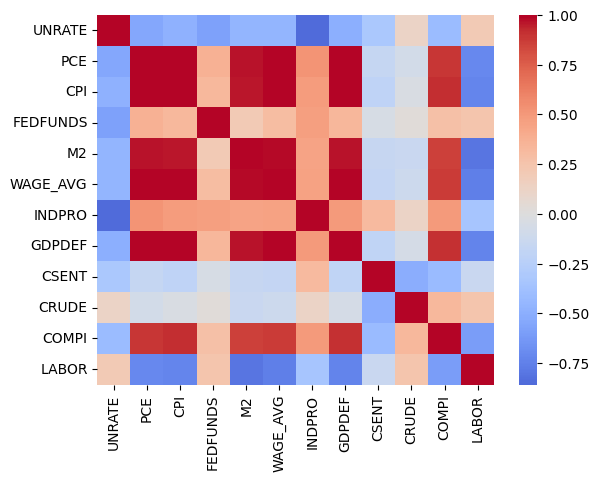

In [33]:


sns.heatmap(df_all.corr(), cmap="coolwarm", center=0)

Checking stationarity 

In [34]:
#Augmented Dickey-Fuller test
# p value 0.05

from statsmodels.tsa.stattools import adfuller

for col in df_all.columns:
    result = adfuller(df_all[col].dropna())
    print(col, result[1])  # p-value


UNRATE 0.09778595515280403
PCE 0.9990314961524978
CPI 0.9988050283135174
FEDFUNDS 0.07920506061940774
M2 0.9560803157750354
WAGE_AVG 1.0
INDPRO 0.3022108269314992
GDPDEF 0.9953090365668694
CSENT 0.3595361287521356
CRUDE 0.014678463353924082
COMPI 0.7136945195119879
LABOR 0.36919327553944514


Generate Stationary data

In [35]:
# #use differencing to stablize the mean and variance for statistical tests


#log transform for 
df_stationary= pd.DataFrame()
list_highval= [ 'PCE', 'M2', 'WAGE_AVG', 'INDPRO', 'CRUDE', 'COMPI'] #these have large differences to stablise it we log 
for col in df_all.columns:

    series = df_all[col].dropna()
    if col in list_highval:
        series= np.log(series)

    p_value= adfuller(series)[1]
    diff_count=0
    if p_value>0.05:
        series = series.diff().dropna()
        p_value= adfuller(series)[1]
        diff_count+=1
    print(f"{col}: stationary after {diff_count} differencing(s), p-value={p_value:.4f}")
    df_stationary[col] = series


    


UNRATE: stationary after 1 differencing(s), p-value=0.0000
PCE: stationary after 1 differencing(s), p-value=0.0000
CPI: stationary after 1 differencing(s), p-value=0.0000
FEDFUNDS: stationary after 1 differencing(s), p-value=0.0070
M2: stationary after 1 differencing(s), p-value=0.0008
WAGE_AVG: stationary after 1 differencing(s), p-value=0.0000
INDPRO: stationary after 1 differencing(s), p-value=0.0000
GDPDEF: stationary after 1 differencing(s), p-value=0.2168
CSENT: stationary after 1 differencing(s), p-value=0.0000
CRUDE: stationary after 0 differencing(s), p-value=0.0076
COMPI: stationary after 1 differencing(s), p-value=0.0000
LABOR: stationary after 1 differencing(s), p-value=0.0000


In [36]:
import matplotlib.pyplot as plt

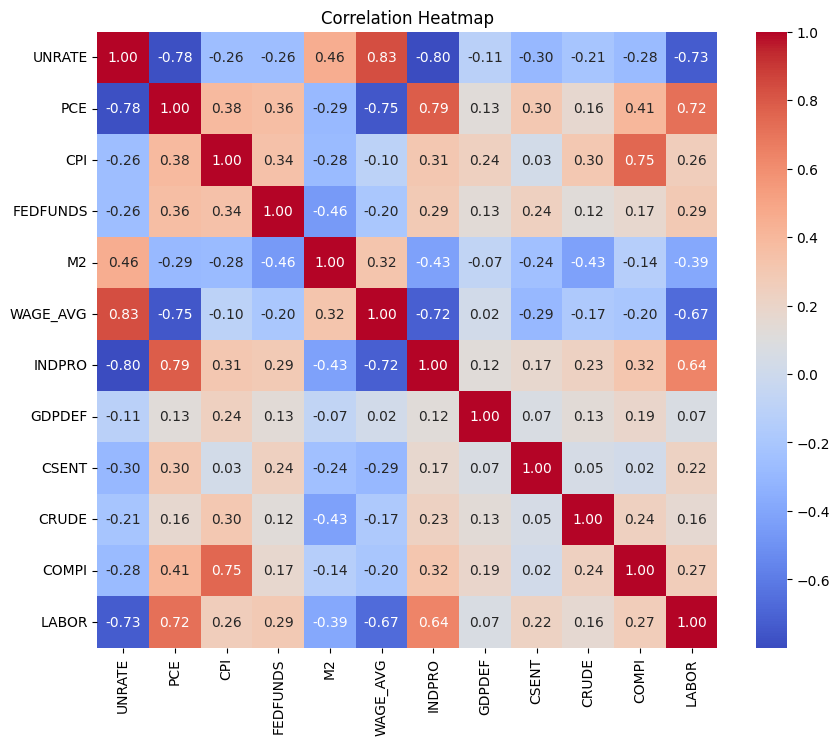

In [37]:
corr = df_stationary.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

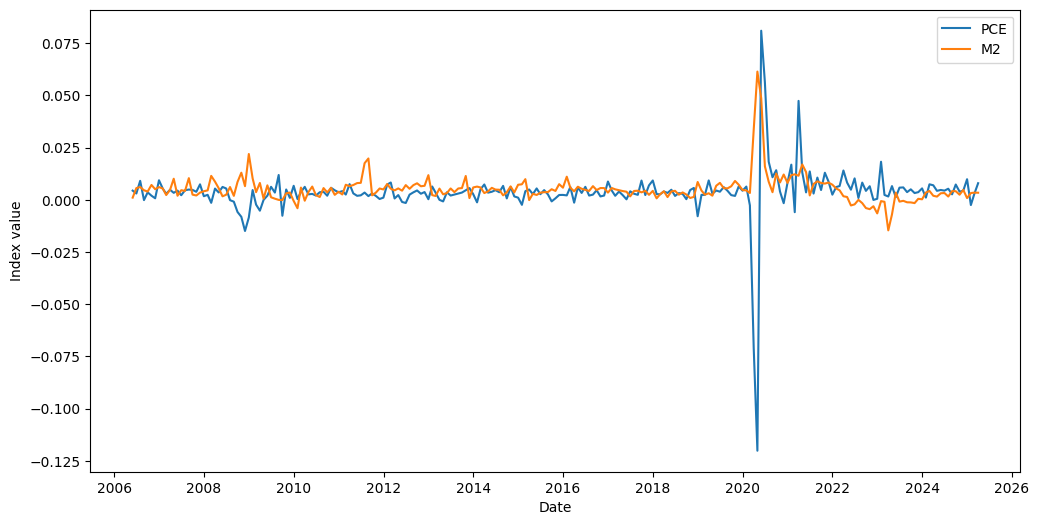

In [38]:
plt.figure(figsize=(12,6))

plt.plot(df_stationary.index, df_stationary['PCE'], label ='PCE' )

plt.plot(df_stationary.index, df_stationary['M2'], label='M2')
plt.xlabel('Date')
plt.ylabel('Index value')
plt.legend()
plt.show()

#it clealy shows the effects of massive money flushed into economy by USgov  M2 spike shows it 
#while personal consumption went down by a lot due to uncertainity in households and job losses 


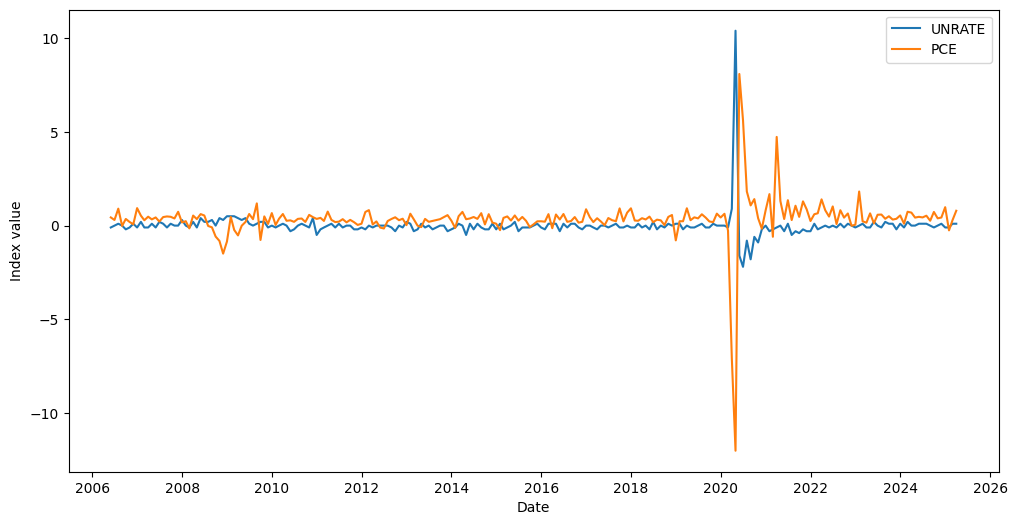

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df_stationary.index, df_stationary['UNRATE'], label='UNRATE')
plt.plot(df_stationary.index, df_stationary['PCE']*100, label='PCE')# for scaling 

# plt.plot(df_stationary.index, df_stationary['FEDFUNDS'], label='FEDFUNDS')

plt.xlabel('Date')
plt.ylabel('Index value')
plt.legend()
plt.show()
# Phillips curve is flattening meaning inflation changes don’t move unemployment as much 
#however we are unsure of how accurate the unemployment data is due to rise of gig economies where keeping track of employment is hard


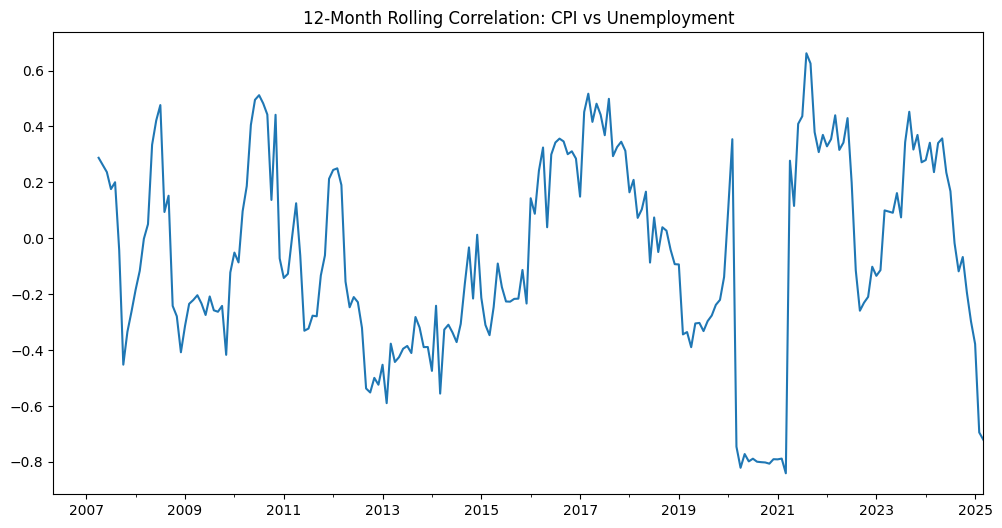

In [40]:
rolling_corr = df_stationary['CPI'].rolling(12).corr(df_stationary['UNRATE'])
rolling_corr.plot(figsize=(12,6))
plt.title('12-Month Rolling Correlation: CPI vs Unemployment')
plt.show()



Visualization of some indexes

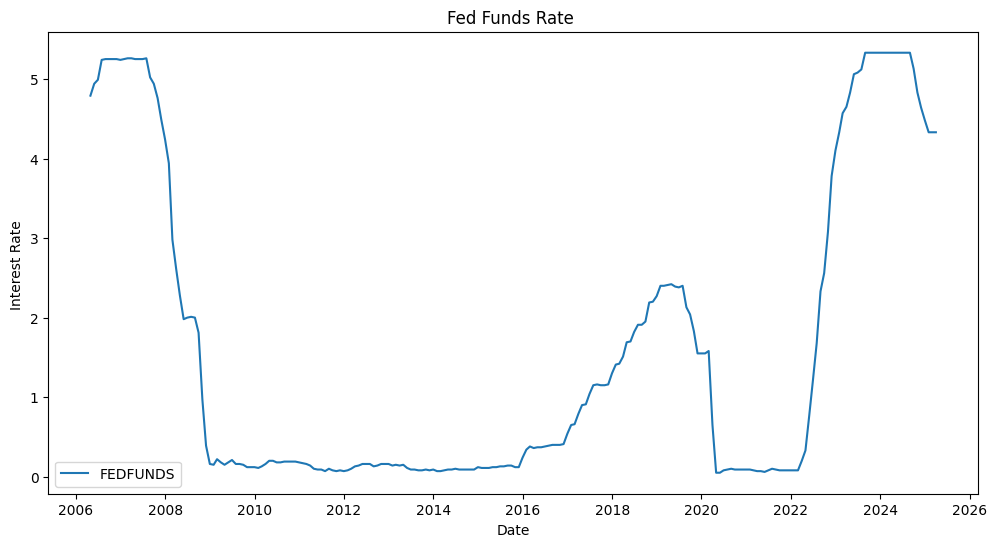

In [41]:
plt.figure(figsize=(12,6))


plt.plot(df_all.index, df_all['FEDFUNDS'], label='FEDFUNDS')

plt.xlabel('Date')
plt.ylabel('Interest Rate ')
plt.title('Fed Funds Rate ')
plt.legend()
plt.show()

Checking lagged correlation 

In [42]:

def plot_lagged_corr(x, y, max_lag=12, series_names=('X','Y')):
    """
    Computes and plots cross-correlation between two series for lags -max_lag to +max_lag.
    Prints the lag with the strongest correlation.
    
    Parameters:
        x, y: 1D arrays or pandas Series of same length
        max_lag: maximum number of periods to lag
        series_names: tuple with names for labeling
    """
    x = np.array(x)
    y = np.array(y)
    
    x= x- x.mean()
    y= y- y.mean()
    
    lags = range(-max_lag, max_lag+1)
    ccf_values = []

    for lag in lags:
        if lag < 0:
            corr = np.corrcoef(x[:lag], y[-lag:])[0,1] #x trails y 
        elif lag > 0:
            corr = np.corrcoef(x[lag:], y[:-lag])[0,1] # y trails x 
        else:
            corr = np.corrcoef(x, y)[0,1]
        ccf_values.append(corr)

    abs_ccf = np.abs(ccf_values)
    max_idx = np.argmax(abs_ccf)
    best_lag = lags[max_idx]
    best_corr = ccf_values[max_idx]
    
    print(f"Strongest correlation = {best_corr:.3f} at lag = {best_lag} months")

    
    plt.figure(figsize=(10,5))
    plt.bar(lags, ccf_values, color='skyblue')
    plt.xlabel('Lag (months)')
    plt.ylabel('Correlation')
    plt.title(f'Cross-correlation: {series_names[0]} vs {series_names[1]}')
    plt.axvline(best_lag, color='red', linestyle='--', label=f'Max corr at lag {best_lag}')
    plt.legend()
    plt.show()

    return ccf_values, lags

    

Strongest correlation = -0.262 at lag = 0 months


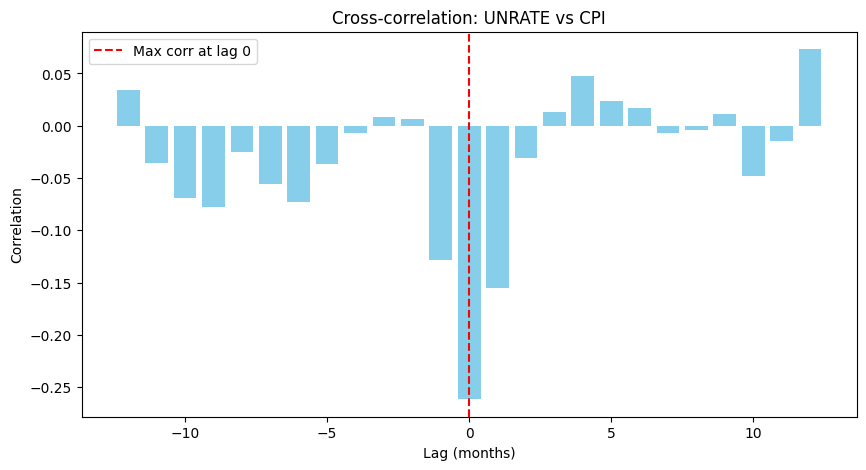

In [43]:
x = df_stationary['UNRATE']
y = df_stationary['CPI']

ccf_values, lags = plot_lagged_corr(x, y, max_lag=12, series_names=('UNRATE','CPI'))


M2 vs PCE 

Strongest correlation = -0.473 at lag = 1 months


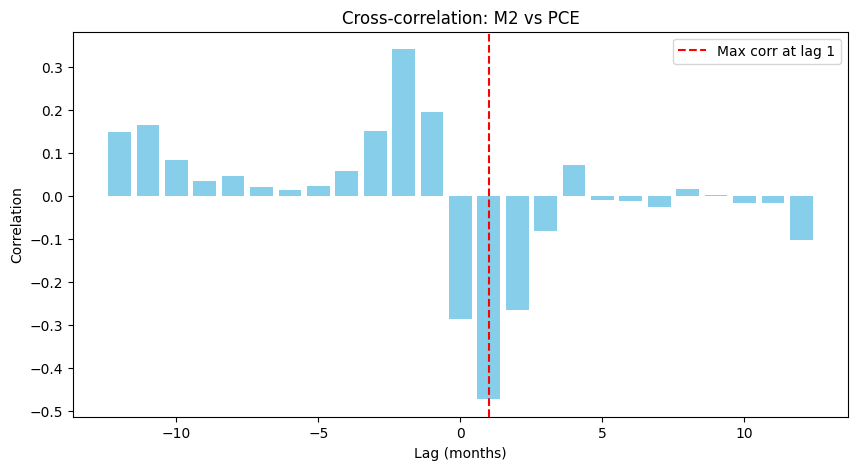

In [44]:
x = df_stationary['M2']
y = df_stationary['PCE']

ccf_values, lags = plot_lagged_corr(x, y, max_lag=12, series_names=('M2','PCE'))


Strongest correlation = -0.473 at lag = -1 months


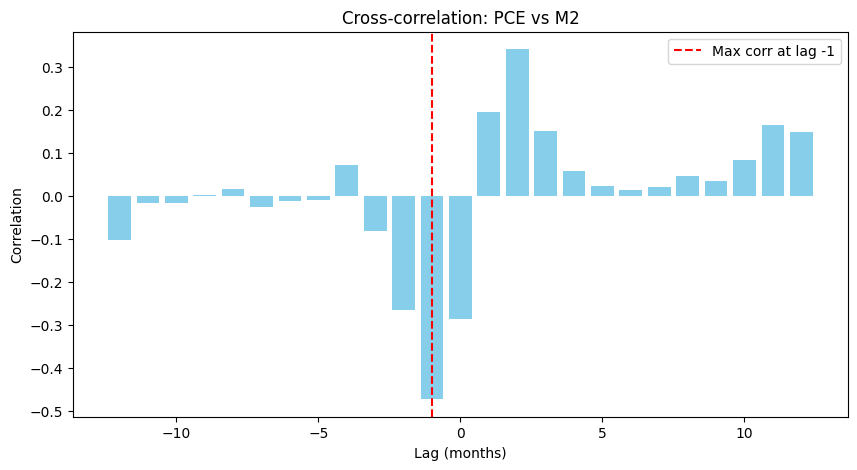

In [45]:
x = df_stationary['PCE']
y = df_stationary['M2']

ccf_values, lags = plot_lagged_corr(x, y, max_lag=12, series_names=('PCE','M2'))


#We can see both are mirror images too

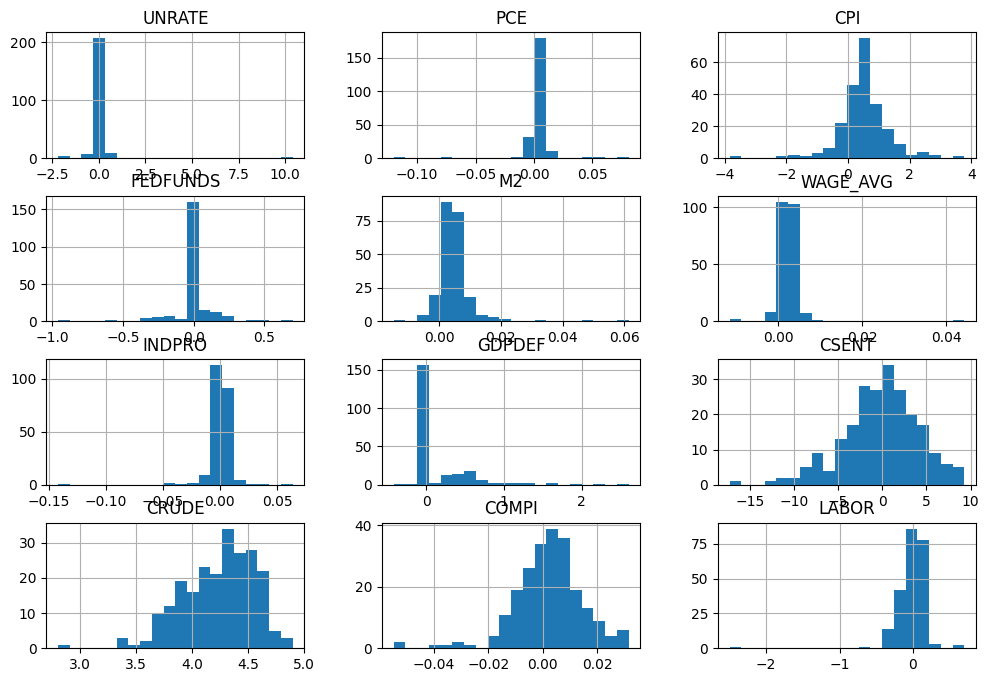

In [46]:
df_stationary.hist(bins=20, figsize=(12,8))
plt.show()


<Axes: title={'center': 'Commodity price index rolling volatility'}>

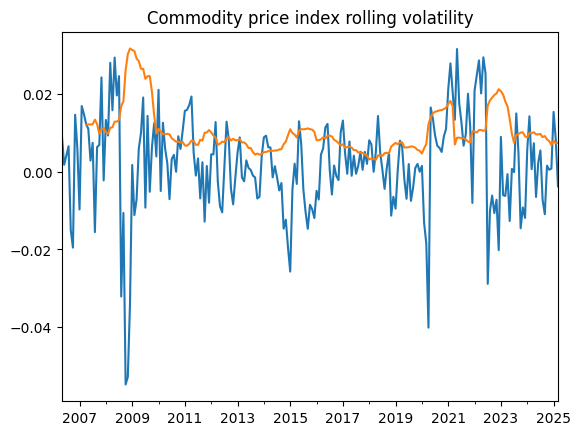

In [47]:
df_stationary['COMPI'].plot()
df_stationary['COMPI'].rolling(12).std().plot(title='Commodity price index rolling volatility')


Hypothesis Testing

Philips curve 

In [48]:
df_stationary['PCE'].mode()

0     -0.120135
1     -0.070928
2     -0.014951
3     -0.008503
4     -0.008169
         ...   
222    0.018192
223    0.018197
224    0.047329
225    0.056193
226    0.080911
Name: PCE, Length: 227, dtype: float64

Unemployment rate changes  granger causes PCE changes 

In [49]:
from statsmodels.tsa.stattools import grangercausalitytests
max_lag =12
results=grangercausalitytests(df_stationary[['PCE', 'UNRATE']], maxlag=max_lag, verbose=False)#is PCE dependednt on UNRATE 
for lag in results:
    f_test = results[lag][0]['ssr_ftest']
    print(f"Lag {lag}: F = {f_test[0]:.4f}, p = {f_test[1]:.4f}")
#first some lags have most of predictive power 

Lag 1: F = 123.2468, p = 0.0000
Lag 2: F = 47.0301, p = 0.0000
Lag 3: F = 32.1077, p = 0.0000
Lag 4: F = 24.0372, p = 0.0000
Lag 5: F = 19.9764, p = 0.0000
Lag 6: F = 16.6453, p = 0.0000
Lag 7: F = 14.2850, p = 0.0000
Lag 8: F = 12.4661, p = 0.0000
Lag 9: F = 11.0747, p = 0.0000
Lag 10: F = 10.4172, p = 0.0000
Lag 11: F = 14.6403, p = 0.0000
Lag 12: F = 15.0132, p = 0.0000


/opt/homebrew/Caskroom/miniconda/base/envs/dsc_env/lib/python3.14/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


M2 granger causes PCE 

In [50]:
df_stationary['PCE'].corr(df_stationary['M2'])

np.float64(-0.28646599810091194)

In [51]:
results=grangercausalitytests(df_stationary[['PCE', 'M2']], maxlag=max_lag, verbose=False)#is PCE dependednt on UNRATE 
for lag in results:
    f_test = results[lag][0]['ssr_ftest']
    print(f"Lag {lag}: F = {f_test[0]:.4f}, p = {f_test[1]:.4f}")

# for lag of 1 , 

Lag 1: F = 15.4638, p = 0.0001
Lag 2: F = 7.8156, p = 0.0005
Lag 3: F = 6.0461, p = 0.0006
Lag 4: F = 4.0679, p = 0.0034
Lag 5: F = 3.2272, p = 0.0079
Lag 6: F = 2.7456, p = 0.0137
Lag 7: F = 2.5301, p = 0.0162
Lag 8: F = 2.2205, p = 0.0274
Lag 9: F = 2.0729, p = 0.0336
Lag 10: F = 1.7452, p = 0.0732
Lag 11: F = 1.5661, p = 0.1114
Lag 12: F = 1.4962, p = 0.1283


/opt/homebrew/Caskroom/miniconda/base/envs/dsc_env/lib/python3.14/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Unemployment granger causes CPI 

In [52]:
results=grangercausalitytests(df_stationary[['CPI', 'UNRATE']], maxlag=max_lag, verbose=False)#is cpi dependednt on UNRATE 
for lag in results:
    f_test = results[lag][0]['ssr_ftest']
    print(f"Lag {lag}: F = {f_test[0]:.4f}, p = {f_test[1]:.4f}")

#We couldnt diprove null hypothesis 


Lag 1: F = 0.1257, p = 0.7232
Lag 2: F = 0.6561, p = 0.5199
Lag 3: F = 0.4871, p = 0.6916
Lag 4: F = 0.4006, p = 0.8081
Lag 5: F = 0.3660, p = 0.8715
Lag 6: F = 0.3694, p = 0.8978
Lag 7: F = 0.2991, p = 0.9536
Lag 8: F = 0.3050, p = 0.9635
Lag 9: F = 0.4277, p = 0.9192
Lag 10: F = 0.3804, p = 0.9541
Lag 11: F = 0.3336, p = 0.9774
Lag 12: F = 0.3230, p = 0.9845


/opt/homebrew/Caskroom/miniconda/base/envs/dsc_env/lib/python3.14/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [222]:

variables = ['UNRATE', 'PCE', 'CPI', 'FEDFUNDS', 'M2', 'WAGE_AVG', 'INDPRO',
       'GDPDEF', 'CSENT', 'CRUDE', 'COMPI', 'LABOR']
max_lag = 12

results_list = []

for target in variables:
    for predictor in variables:
        if target == predictor:
            continue
        try:
            test_data = df_stationary[[target, predictor]].dropna()
            test_result = grangercausalitytests(test_data, maxlag=max_lag, verbose=False)

            for lag in range(1, max_lag + 1):
                p_val = test_result[lag][0]['ssr_ftest'][1]
                results_list.append({
                    'target': target,
                    'predictor': predictor,
                    'lag': lag,
                    'p_value': p_val
                })

        except Exception as e:
            print(f"Error testing {predictor} => {target}: {e}")

# Convert to DataFrame
granger_df = pd.DataFrame(results_list)

# Filter to keep only significant results (e.g., p < 0.05)
significant = granger_df[granger_df['p_value'] < 0.05]

# Optional: get best (lowest p) lag per pair
best_per_pair = significant.groupby(['target', 'predictor']).apply(lambda g: g.loc[g['p_value'].idxmin()]).reset_index(drop=True)

# Save if needed
granger_df.to_csv('granger_all_results.csv', index=False)
best_per_pair.to_csv('granger_significant_summary.csv', index=False)

/opt/homebrew/Caskroom/miniconda/base/envs/dsc_env/lib/python3.14/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dsc_env/lib/python3.14/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dsc_env/lib/python3.14/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dsc_env/lib/python3.14/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dsc_env/lib/python3.14/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since fu

Save the files

In [55]:
import os

output_dir = "output_preprocess"

os.makedirs(output_dir, exist_ok=True)

df_stationary.to_csv(os.path.join(output_dir, "df_stationary_nonexog.csv"), index=True)
df_all.to_csv(os.path.join(output_dir, "df_all_nonexog.csv"), index=True)


Use modelling for significant variables 

In [ ]:
#Model PCE 
